In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=0)

In [2]:
cos_list = [np.cos(x * 2 * np.pi / 5) for x in np.arange(5)]
sin_list = [np.sin(x * 2 * np.pi / 5) for x in np.arange(5)]

offsets = np.array([.2, .2, .2, .2, .2])

In [4]:
class Line:
    # a*x + b*y = c
    def __init__(self, a, b, c, grid):
        self.a = a
        self.b = b
        self.c = c
        self.grid = grid

    # Build function to get lines that hit boundaries
    # Maybe use build intersection function and use a line for each boundary!!!???
    def determine_intersection(self, other_line):
        denom = (self.a * other_line.b) - (other_line.a * self.b)
        if denom == 0:
            return False
        else:
            x = (other_line.b * self.c) - (self.b * other_line.c)
            x = x / denom

            y = (self.a * other_line.c) - (other_line.a * self.c)
            y = y / denom

            return (x, y)

# Using standard form, a and b are the cos, sin list, while c is k

In [17]:
l1 = Line(cos_list[1], sin_list[1], offsets[1] + 0, 1)


In [32]:
b1 = Line(0, 1, 5, 0)
b2 = Line(0, 1, -5, 0)
b3 = Line(1, 0, 5, 0)
b4 = Line(1, 0, -5, 0)

i1 = l1.determine_intersection(b1)
i2 = l1.determine_intersection(b2)
i3 = l1.determine_intersection(b3)
i4 = l1.determine_intersection(b4)

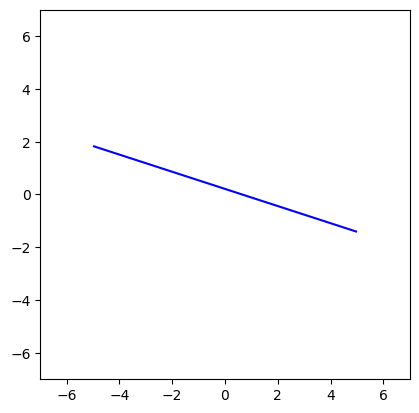

In [30]:
lines = [[i1, i2]]
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
plt.show()

In [35]:
boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

points = []
for b in boundary:
    intersection = l1.determine_intersection(b)
    if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
        points.append(intersection)

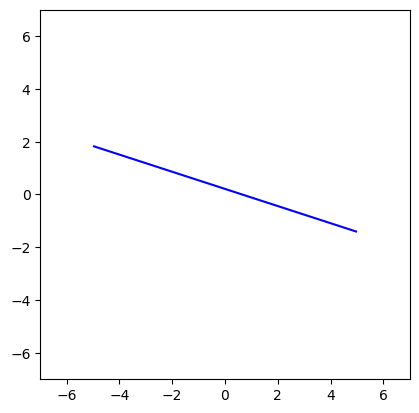

In [37]:
lines = [points]
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
plt.show()

In [38]:
grids = []
grid = 1
for s, c, o in zip(sin_list, cos_list, offsets):
    for k in np.arange(-3, 3):
        grids.append(Line(c, s, o + k, grid))
    grid += 1

In [49]:
boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if intersection:
            if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
                points.append(intersection)
    lines.append(points)

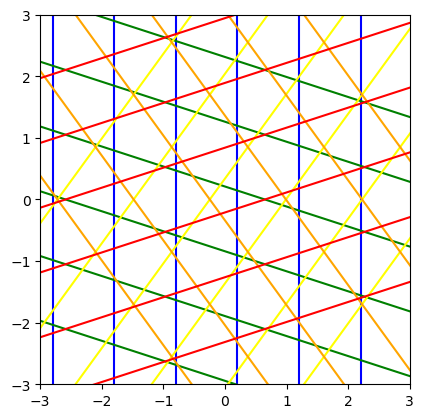

In [56]:
colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

In [ ]:
from itertools import product

now go through all the combinations